# Data Engineer Programming Assignment
We've provided a source file, btc.csv, which contains several years of Bitcoin pricing data.
Please provide a solution which filters and summarises this data. The original pricing is in USD but as a
European organisation we'd like to view summaries in Euros.
There are three outputs expected
1. A new file with the past year's data
2. A short summary table to the standard output
3. A line chart of the past year's price
Providing the Solution
You can use any environment for your solution implementation. If in doubt though, the Python tooling is a
good choice. Please provide the solution as if this was part of a project you were working on with your team.

Summary File
Please output a new csv file. The summary file should contain the following
Past year's data
Columns: Date, Volume.
New Columns: Low (EUR) & High (EUR) converted to Euro.
The daily USD to EUR conversion rate can be assumed as 0.87 for this example.
Please note that whenever we mention past year, we mean the past 365 days from the last data point's date
in the csv file provided.
Summary Output
Print the following on the standard output:
Min, max and mean for the following metrics in the past year:
        Volume in Billions. 
        Low (EUR)
        High (EUR)
Line chart
Plot a line-graph (export as an image file) of the Bitcoin price (Low & High) in the past year.

# Importing  the various libraries and saving the dataset.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
btc = pd.read_csv("btc.csv")

# Display
Now that we have saved our DataFrames, we may want to preview them without loading the whole thing. This is especially helpful when the datasets are particularly large.To do so, we can use .head() function.
Note that you can specify within the () the number of rows to display, otherwise the default of 5 rows will display

In [3]:
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
btc.set_index('Date',inplace=True)
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1888 entries, 2014-09-17 to 2019-11-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1888 non-null   float64
 1   High       1888 non-null   float64
 2   Low        1888 non-null   float64
 3   Close      1888 non-null   float64
 4   Adj Close  1888 non-null   float64
 5   Volume     1888 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 103.2+ KB


Finding the past year's data,This is 365 bottom rows, we can use the .tail() function and saving as new dataframe btc_new

In [6]:
btc_new = btc.tail(365)
btc_new

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-18,5559.740234,5653.609863,5559.740234,5623.540039,5623.540039,4159680000
2018-11-19,5620.779785,5620.779785,4842.910156,4871.490234,4871.490234,7039560000
2018-11-20,4863.930176,4951.609863,4272.109863,4451.870117,4451.870117,8428290000
2018-11-21,4465.540039,4675.729980,4343.979980,4602.169922,4602.169922,6120120000
2018-11-22,4611.569824,4629.640137,4365.640137,4365.939941,4365.939941,4569370000
...,...,...,...,...,...,...
2019-11-13,8812.033203,8836.841797,8761.651367,8808.262695,8808.262695,17545755404
2019-11-14,8811.936523,8826.943359,8692.551758,8708.094727,8708.094727,19084739974
2019-11-15,8705.708008,8730.873047,8484.843750,8491.992188,8491.992188,21796856471


# Currency Conversion

In [7]:
from currency_converter import CurrencyConverter
c = CurrencyConverter(fallback_on_missing_rate=True)
from datetime import date

In [8]:
# 1USD = 0.87 EUR

c = CurrencyConverter(fallback_on_missing_rate= 0.87)
c.convert(5653.609863, 'USD', date=date(2018, 11, 18))


4959.306897368421

currencyconverter() seems to work well

In [9]:
btc_new["High (EUR)"] = btc_new.apply(lambda x: c.convert(x['High'],'USD', 'EUR', date=date(2018, 11, 18) ), axis=1)
btc_new["Low (EUR)"] = btc_new.apply(lambda x: c.convert(x['Low'],'USD', 'EUR', date=date(2018, 11, 18) ), axis=1)
btc_new["Volume (Billion)"] = btc_new.apply(lambda x: c.convert(x['Volume'],'USD', 'EUR', date=date(2018, 11, 18) ), axis=1)
btc_new

<ipython-input-9-ddd101eb8ddd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_new["High (EUR)"] = btc_new.apply(lambda x: c.convert(x['High'],'USD', 'EUR', date=date(2018, 11, 18) ), axis=1)
<ipython-input-9-ddd101eb8ddd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_new["Low (EUR)"] = btc_new.apply(lambda x: c.convert(x['Low'],'USD', 'EUR', date=date(2018, 11, 18) ), axis=1)
<ipython-input-9-ddd101eb8ddd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,Open,High,Low,Close,Adj Close,Volume,High (EUR),Low (EUR),Volume (Billion)
Date,,,,,,,,,
2018-11-18,5559.740234,5653.609863,5559.740234,5623.540039,5623.540039,4159680000,4959.306897,4876.965118,3.648842e+09
2018-11-19,5620.779785,5620.779785,4842.910156,4871.490234,4871.490234,7039560000,4930.508583,4248.166804,6.175053e+09
2018-11-20,4863.930176,4951.609863,4272.109863,4451.870117,4451.870117,8428290000,4343.517424,3747.464792,7.393237e+09
2018-11-21,4465.540039,4675.729980,4343.979980,4602.169922,4602.169922,6120120000,4101.517526,3810.508754,5.368526e+09
2018-11-22,4611.569824,4629.640137,4365.640137,4365.939941,4365.939941,4569370000,4061.087839,3829.508892,4.008219e+09
...,...,...,...,...,...,...,...,...,...
2019-11-13,8812.033203,8836.841797,8761.651367,8808.262695,8808.262695,17545755404,7751.615611,7685.659094,1.539101e+10
2019-11-14,8811.936523,8826.943359,8692.551758,8708.094727,8708.094727,19084739974,7742.932771,7625.045402,1.674100e+10
2019-11-15,8705.708008,8730.873047,8484.843750,8491.992188,8491.992188,21796856471,7658.660568,7442.845395,1.912005e+10


In [10]:
btc_1 = btc_new.drop(['Open','Close','Adj Close'],axis=1)

In [11]:
btc_1

,High,Low,Volume,High (EUR),Low (EUR),Volume (Billion)
Date,,,,,,
2018-11-18,5653.609863,5559.740234,4159680000,4959.306897,4876.965118,3.648842e+09
2018-11-19,5620.779785,4842.910156,7039560000,4930.508583,4248.166804,6.175053e+09
2018-11-20,4951.609863,4272.109863,8428290000,4343.517424,3747.464792,7.393237e+09
2018-11-21,4675.729980,4343.979980,6120120000,4101.517526,3810.508754,5.368526e+09
2018-11-22,4629.640137,4365.640137,4569370000,4061.087839,3829.508892,4.008219e+09
...,...,...,...,...,...,...
2019-11-13,8836.841797,8761.651367,17545755404,7751.615611,7685.659094,1.539101e+10
2019-11-14,8826.943359,8692.551758,19084739974,7742.932771,7625.045402,1.674100e+10
2019-11-15,8730.873047,8484.843750,21796856471,7658.660568,7442.845395,1.912005e+10


In [12]:
btc_1.drop(['High','Low','Volume'],axis=1)

,High (EUR),Low (EUR),Volume (Billion)
Date,,,
2018-11-18,4959.306897,4876.965118,3.648842e+09
2018-11-19,4930.508583,4248.166804,6.175053e+09
2018-11-20,4343.517424,3747.464792,7.393237e+09
2018-11-21,4101.517526,3810.508754,5.368526e+09
2018-11-22,4061.087839,3829.508892,4.008219e+09
...,...,...,...
2019-11-13,7751.615611,7685.659094,1.539101e+10
2019-11-14,7742.932771,7625.045402,1.674100e+10
2019-11-15,7658.660568,7442.845395,1.912005e+10


# Summarizing Data(min,max and mean)

For the High(EUR)

In [13]:
print("mean {}".format(btc_new['High'].mean()))
print("min {}".format(btc_new['High'].min()))
print("max {}".format(btc_new['High'].max()))

mean 7131.515348783561
min 3275.37793
max 13796.489258


For the Low(EUR)

In [14]:
print("mean {}".format(btc_new['Low'].mean()))
print("min {}".format(btc_new['Low'].min()))
print("max {}".format(btc_new['Low'].max()))

mean 6805.783948936987
min 3191.303467
max 12233.261719


For the Volume(Billion)

In [15]:
print("mean {}".format(btc_new['Volume'].mean()))
print("min {}".format(btc_new['Volume'].min()))
print("max {}".format(btc_new['Volume'].max()))

mean 14809082428.69589
min 3551763561
max 45105733173


sumarising the btc_1 and forming a new dataframe btc_2 using groupby

In [16]:
btc_2 = btc_1.groupby('Date').agg(['mean', 'min', 'max']) 
  
print("Mean, min, and max values of bitcoin price grouped by Date") 
print(btc_2)

Mean, min, and max values of bitcoin price grouped by Date
                   High                                    Low               \
                   mean          min          max         mean          min   
Date                                                                          
2018-11-18  5653.609863  5653.609863  5653.609863  5559.740234  5559.740234   
2018-11-19  5620.779785  5620.779785  5620.779785  4842.910156  4842.910156   
2018-11-20  4951.609863  4951.609863  4951.609863  4272.109863  4272.109863   
2018-11-21  4675.729980  4675.729980  4675.729980  4343.979980  4343.979980   
2018-11-22  4629.640137  4629.640137  4629.640137  4365.640137  4365.640137   
...                 ...          ...          ...          ...          ...   
2019-11-13  8836.841797  8836.841797  8836.841797  8761.651367  8761.651367   
2019-11-14  8826.943359  8826.943359  8826.943359  8692.551758  8692.551758   
2019-11-15  8730.873047  8730.873047  8730.873047  8484.843750  8484.843

In [17]:
btc_2.drop(['High','Low','Volume'],axis=1)

High (EUR)                              Low (EUR)               \
                   mean          min          max         mean          min   
Date                                                                          
2018-11-18  4959.306897  4959.306897  4959.306897  4876.965118  4876.965118   
2018-11-19  4930.508583  4930.508583  4930.508583  4248.166804  4248.166804   
2018-11-20  4343.517424  4343.517424  4343.517424  3747.464792  3747.464792   
2018-11-21  4101.517526  4101.517526  4101.517526  3810.508754  3810.508754   
2018-11-22  4061.087839  4061.087839  4061.087839  3829.508892  3829.508892   
...                 ...          ...          ...          ...          ...   
2019-11-13  7751.615611  7751.615611  7751.615611  7685.659094  7685.659094   
2019-11-14  7742.932771  7742.932771  7742.932771  7625.045402  7625.045402   
2019-11-15  7658.660568  7658.660568  7658.660568  7442.845395  7442.845395   
2019-11-16  7536.839535  7536.839535  7536.839535  7433.310204  7433.310204   
2019-11-17  7655.955318  7655.955318  7655.955318  7456.989275  7456.989275   

                        Volume (Billion)                              
                    max             mean           min           max  
Date                                                                  
2018-11-18  4876.965118     3.648842e+09  3.648842e+09  3.648842e+09  
2018-11-19  4248.166804     6.175053e+09  6.175053e+09  6.175053e+09  
2018-11-20  3747.464792     7.393237e+09  7.393237e+09  7.393237e+09  
2018-11-21  3810.508754     5.368526e+09  5.368526e+09  5.368526e+09  
2018-11-22  3829.508892     4.008219e+09  4.008219e+09  4.008219e+09  
...                 ...              ...           ...           ...  
2019-11-13  7685.659094     1.539101e+10  1.539101e+10  1.539101e+10  
2019-11-14  7625.045402     1.674100e+10  1.674100e+10  1.674100e+10  
2019-11-15  7442.845395     1.912005e+10  1.912005e+10  1.912005e+10  
2019-11-16  7433.310204     1.446964e+10  1.446964e+10  1.446964e+10  
2019-11-17  7456.989275     1.637600e+10  1.637600e+10  1.637600e+10  

[365 rows x 9 columns]

# Displaying with plots
One handy tool included with pandas is the .plots() function. There are many different plots for you to choose from (such as bar, line, and scattergram) depending on what data you have and how you want to display it. We can do this using .plot.line().
we can optionanally specify x and y values in your plot

<AxesSubplot:xlabel='Low'>

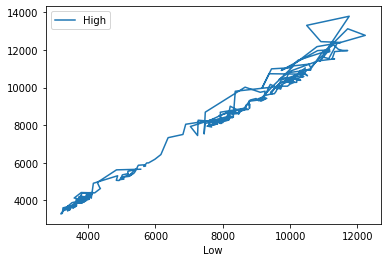

In [18]:
btc_1.plot.line(x='Low', y='High')